In [8]:
# pip install statsmodels 


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/52/fc/4c0e654ab177558a657eaba369e5a25fbf700f95f1d122f6c083525d58c4/statsmodels-0.14.1-cp312-cp312-win_amd64.whl.metadata
  Using cached statsmodels-0.14.1-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/32/0e/0039df17094e8d9d26b69bd8e976e179b1f6cc772f9ffb597640d5016772/patsy-0.5.5-py2.py3-none-any.whl.metadata
  Using cached patsy-0.5.5-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.1-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.5-py2.py3-none-any.whl (234 kB)


# Boston Housing Price Prediction using Linear Regression

## About the Dataset
The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Each record in the database describes a Boston suburb or town. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository):
1. **CRIM**: per capita crime rate by town
2. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**: nitric oxides concentration (parts per 10 million)
6. **RM**: average number of rooms per dwelling
7. **AGE**: proportion of owner-occupied units built prior to 1940
8. **DIS**: weighted distances to ﬁve Boston employment centers
9. **RAD**: index of accessibility to radial highways
10. **TAX**: full-value property-tax rate per $10,000
11. **PTRATIO**: pupil-teacher ratio by town.
12. **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town.
13. **LSTAT**: % lower status of the population
14. **MEDV**: Median value of owner-occupied homes in $1000s

In [9]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

## Load the Dataset

In [11]:
# Load the dataset
file_path = 'boston.csv'
boston_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Basic Information

In [12]:
# Basic information about the dataset
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Target Variable
**MEDV** - Median value of owner-occupied homes in $1000s

## Missing Values, Data Types, and Basic Statistical Information

### Missing Values

In [13]:
# Checking for missing values
missing_values = boston_data.isnull().sum()

missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are NO missing values in the dataset, which is great for analysis.

### Data Types

In [14]:
# Checking for data types
data_types = boston_data.dtypes
data_types

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

The data types are appropriate for each feature with most being **float64** and a few being **int64**.

### Basic Statistical Information

In [15]:
# Checking for basic statistical information
basic_stats = boston_data.describe()
basic_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation Analysis

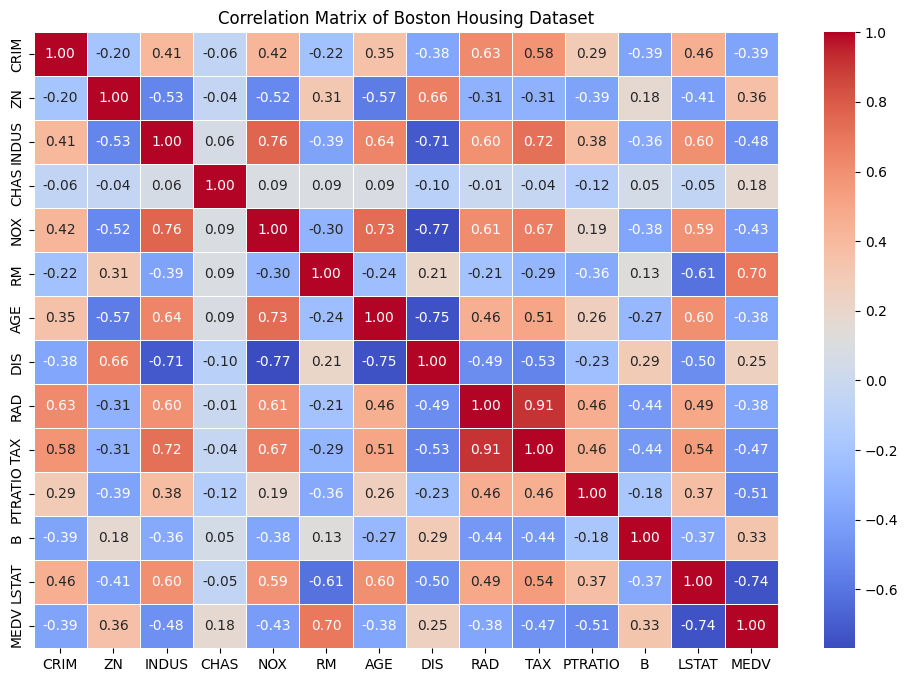

In [16]:
# Correlation matrix
correlation_matrix = boston_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()

The heatmap displays the correlation matrix for the Boston Housing dataset. Here are some key observations relevant to linear regression:

**High Correlations with Target Variable (MEDV)**: Several features show a significant correlation with the target variable **MEDV** (Median value of owner-occupied homes). For instance, **RM** (average number of rooms per dwelling) has a strong positive correlation (0.70), while **LSTAT** (percentage of lower status of the population) shows a strong negative correlation (-0.74).

**Multicollinearity among Features**: There are some pairs of features that exhibit high correlation with each other, which indicates multicollinearity. For example, **NOX** (nitric oxides concentration) and **INDUS** (proportion of non-retail business acres per town) are highly correlated, as are **AGE** (proportion of owner-occupied units built prior to 1940) and **NOX**. **RAD** (index of accessibility to radial highways) and **TAX** (full-value property-tax rate) also show high correlation.

## Identifying Outliers

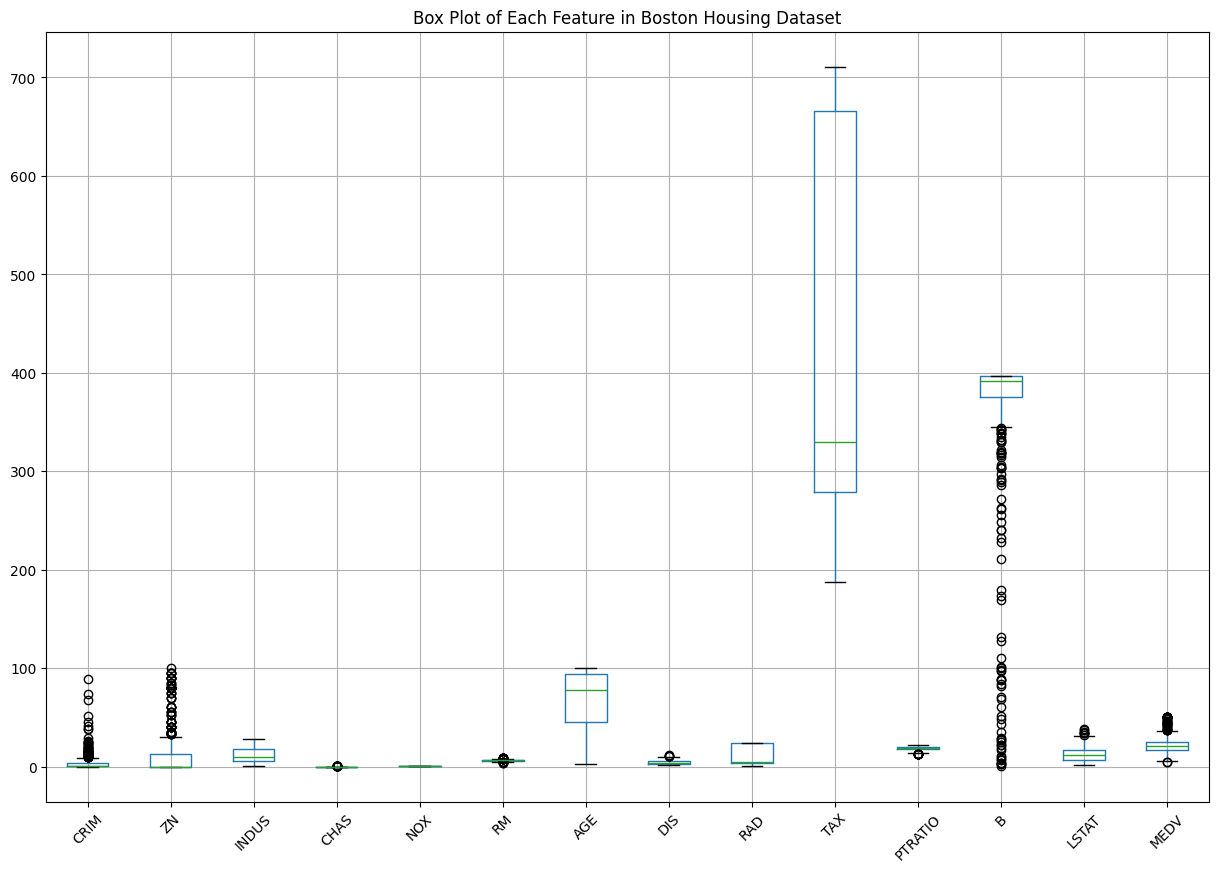

In [17]:
# Plotting box plots for each feature in the dataset to visualize outliers
plt.figure(figsize=(15, 10))
boston_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Each Feature in Boston Housing Dataset')
plt.show()

The box plots for each feature in the Boston Housing dataset reveal the presence of outliers across multiple features. Features like **CRIM**, **ZN**, **B**, and others show a significant number of points outside the typical range (beyond the whiskers of the box plots), indicating outliers.

## Multicollinearity

### Variance Inflation Factor (VIF)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = boston_data.columns
vif_data["VIF"] = [variance_inflation_factor(boston_data.values, i) for i in range(len(boston_data.columns))]

vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
5,RM,136.101743
10,PTRATIO,87.227233
4,NOX,74.004269
9,TAX,61.939713
13,MEDV,24.503206
6,AGE,21.398863
11,B,21.351015
7,DIS,15.430455
8,RAD,15.369980
2,INDUS,14.485874


The Variance Inflation Factor (VIF) results show that several features have high VIF values, indicating potential multicollinearity issues:

1. **RM** (Average number of rooms per dwelling) has the highest VIF, suggesting it might be linearly related to other variables.
2. **PTRATIO** (Pupil-teacher ratio by town), **NOX** (Nitric oxides concentration), **TAX** (Full-value property-tax rate), and **MEDV** (Median value of owner-occupied homes) also show high VIF values.
3. AGE, B, DIS, RAD, and INDUS have moderately high VIF values, indicating possible multicollinearity.

### Identifying and removing one of each pair of highly correlated variables

In [20]:
# Identifying pairs of highly correlated features
high_corr_threshold = 0.75  # Setting a threshold for high correlation
corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[(abs(corr_pairs) > high_corr_threshold) & (abs(corr_pairs) < 1)]

# Sorting the pairs to identify the most correlated ones
sorted_pairs = strong_pairs.sort_values(kind="quicksort", ascending=False)

sorted_pairs

RAD    TAX      0.910228
TAX    RAD      0.910228
INDUS  NOX      0.763651
NOX    INDUS    0.763651
       DIS     -0.769230
DIS    NOX     -0.769230
dtype: float64

Following are a few pairs of features with high correlation:

1. **RAD** (index of accessibility to radial highways) and **TAX** (full-value property-tax rate) have a very high correlation of 0.91.
2. **INDUS** (proportion of non-retail business acres per town) and **NOX** (nitric oxides concentration) are correlated at 0.76.
3. **NOX** and **DIS** (weighted distances to five Boston employment centers) are also correlated at -0.77.

In [21]:
# Checking the correlation of these variables with the target variable (MEDV)
correlation_with_medv = correlation_matrix["MEDV"].drop("MEDV")  # Exclude self-correlation

# Correlations of the identified variables with MEDV
correlation_with_medv[["RAD", "TAX", "INDUS", "NOX", "DIS"]]

RAD     -0.381626
TAX     -0.468536
INDUS   -0.483725
NOX     -0.427321
DIS      0.249929
Name: MEDV, dtype: float64

Based on the correlations of the identified variables with MEDV, we can make the following decisions:

##### 1. Pair: RAD and TAX

RAD has a correlation of -0.38 with MEDV.
TAX has a stronger negative correlation of -0.47 with MEDV.
Decision: Remove RAD, keeping TAX.

##### 2. Pair: INDUS and NOX

INDUS has a correlation of -0.48 with MEDV.
NOX has a correlation of -0.43 with MEDV.
Decision: Remove NOX, keeping INDUS.

##### 3. Pair: NOX and DIS

NOX has been already chosen for removal in the previous pair.
DIS has a positive correlation of 0.25 with MEDV.
Decision: Keep DIS, and NOX is already being removed.

In [22]:
# Removing the chosen variables
variables_to_remove = ["RAD", "NOX"]
modified_boston_data = boston_data.drop(columns=variables_to_remove)

# Displaying the first few rows of the modified dataset
modified_boston_data.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


## Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

# Creating the scaler
scaler = StandardScaler()

# Standardizing the features (excluding the target variable MEDV)
features = modified_boston_data.drop(columns=['MEDV'])
standardized_features = scaler.fit_transform(features)

# Creating a new dataframe for the standardized features
standardized_boston_data = pd.DataFrame(standardized_features, columns=features.columns)
standardized_boston_data['MEDV'] = modified_boston_data['MEDV']  # Adding the target variable back

# Displaying the first few rows of the standardized dataset
standardized_boston_data.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,36.2


## Applying Linear Regression to predict MEDV (Target Variable)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = standardized_boston_data.drop('MEDV', axis=1)
y = standardized_boston_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(26.964454101594807, 0.6323051540564206)

### Performance Metrics

Here are the performance metrics on the test set:

**Mean Squared Error (MSE)**: 26.96
**R-squared (R²)**: 0.63

##### Interpretation:
* **MSE**: This is the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In this case, an MSE of 26.96 suggests that there is a certain degree of error in the model's predictions.

* **R²**: The R-squared value explains how much of the variance in the dependent variable (MEDV) is explained by the model. Here, an R² of 0.63 implies that about 63% of the variance in MEDV is explained by the model, which is a moderate fit.
  
These metrics suggest that the model has a moderate predictive performance.

## Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation
k = 10
cross_val_scores = cross_val_score(LinearRegression(), X, y, cv=k, scoring='r2')

# Displaying the R-squared scores for each fold and the mean R-squared score
cross_val_scores, cross_val_scores.mean()

(array([ 0.70534487,  0.61042551, -0.76790569,  0.60772622,  0.59001626,
         0.75895541,  0.3240807 , -0.20665677, -0.65162669,  0.36284553]),
 0.23332053508095357)

The results from the 10-fold cross-validation for the linear regression model are as follows:

* The R-squared (R²) values for each of the 10 folds vary significantly, ranging from as high as 0.76 to as low as -0.77.
* The mean R² across all 10 folds is approximately 0.23.

##### Interpretation:
* The wide range of R² values and the relatively low mean R² suggest that the model's performance is quite variable across different subsets of the dataset. This could be an indication of overfitting to specific parts of the data or underfitting where the model is not capturing the underlying patterns adequately.
* The negative R² values in some folds indicate that the model performs worse than a simple horizontal line (mean of the target values). This is a sign of poor model performance for those particular data splits.

##### Recommendations:
1. **Model Complexity**: Reassess the complexity of the model. It might be beneficial to explore models that can capture more complex patterns in the data if linear regression is too simple.

2. **Feature Engineering**: Consider revisiting the feature engineering process. There might be important variables or interactions that are not being captured.

3. **Data Quality**: Check the quality of the data. Ensure that it's well-preprocessed, and consider whether there are important variables that are not included.

4. **Alternative Models**: Experiment with different types of models, as linear regression might not be suitable for this dataset.

5. **Regularization**: Try using regularized regression models like Ridge or Lasso, which can help in dealing with overfitting or underfitting.